## Sanbercampus
# FINAL PROJECT

#Analisis Opini customer Shopee tentang COD (Cash on Delivery)

Name  : Risanto Darmawan

Batch : 1

# Business Understanding
**Ulasan customer Shopee tentang COD**

Latar Belakang:
COD di dunia maya dalam hal ini visual (konten video) banyak menampilkan konten yang beropini negatif sehingga menimbulkan pertanyaan apakah memang demikian program Cash on Delivery pada E-Commerce saat ini.

Tujuan Proyek:
-	Melihat apakah Ulasan customer Shopee tentang COD merupakan opini positif atau negative
-	Klasifikasi Opini mengenai COD customer Shopee
-	Menyediakan fitur prediksi pada website streamlit




Dataset yang akan digunakan
https://www.kaggle.com/code/alvianardiansyah/analisis-sentimen-pengguna-shopee-dengan-svm/input


# Data Understanding

## Importing libraries

In [46]:
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

In [45]:
#Stopword Berbahasa Indonesia
pip install Sastrawi

SyntaxError: invalid syntax (<ipython-input-45-c8cba516bbec>, line 2)

## Loading Dataset

In [2]:
# Construct Dataset
data = pd.read_csv('/content/Data ulasan Shopee tentang COD.csv')

In [3]:
#Matrix data dimensions of data structures
data.shape

(1840, 4)

In [4]:
#information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  1840 non-null   object
 1   score     1840 non-null   int64 
 2   at        1840 non-null   object
 3   content   1840 non-null   object
dtypes: int64(1), object(3)
memory usage: 57.6+ KB


**Deskripsi Dataset**<br>
Dataset detail target: score opini (1 = negatif, 5 = positif)<br>
at : tanggal jam opini direcord<br>
score :  (1 = negatif 5 = positif)<br>
username : user yang memberikan opini (Google Play)<br>
content : isi opini (shopee makin mantap)


In [5]:
#the initial 10 rows of a dataset
data.head(10)

,userName,score,at,content
0,Hilleria Nababan,4,2023-12-29 04:06:22,"Aplikasi nya memang bagus ,tapi kalau misalnya..."
1,Wahyu Hidayat,1,2023-12-28 13:48:07,Aplikasi nya sedikit tidak bertanggung jawab k...
2,Ahmad Joko,1,2023-12-28 13:41:09,Tolong sistem cod akun saya tidak diblokir ole...
3,Welson Bekak,1,2023-12-28 09:35:52,Saya kecewa dengan Shopie karena saya pesan ba...
4,Chandra,3,2023-12-27 12:29:25,"Ada berapa expedisi dari pihak Shopee, sampai ..."
5,Reza Amarulloh,5,2023-12-27 12:23:15,Selamat malam mhon maaf saya mu tanya lebih ba...
6,Deslian Hawa,2,2023-12-27 12:14:03,maaf ganggu kak..tapi knp ya tulisan di barang...
7,raduan asman,5,2023-12-27 11:45:09,shopee makin mantap terima kasih sudah memberi...
8,Jhonsonericson Sitanggang,2,2023-12-27 11:39:31,Saya tdk suka yg mengantar barang iya.. walaup...
9,mohamad khoiruddin,2,2023-12-27 10:08:25,Buset 5x belanja tertulis gratis ongkir via co...


In [6]:
#the last 10 rows of a dataset
data.tail(10)

,userName,score,at,content
1830,Pengguna Google,4,2019-05-18 14:10:39,untuk barang dan harga memang menang shopee. t...
1831,Pengguna Google,3,2019-05-02 01:29:06,"Shoppee, tolong untuk kode pembelanjaan dikasi..."
1832,Pengguna Google,1,2019-04-24 06:16:35,"untuk CODnya mengecewakan sekali, di keteranga..."
1833,Pengguna Google,1,2019-03-29 03:55:43,system nya diperbaiki. code OTP SMS shopeepay ...
1834,Pengguna Google,2,2019-02-13 15:53:40,"Gak Ada Pembayaran COD ,,wlpn ada untuk barang..."
1835,Pengguna Google,4,2018-12-20 03:03:04,Udah beberapa kali beli lewat shopee dan cukup...
1836,Pengguna Google,4,2018-11-30 04:16:18,Saya sering belanja di shopee. Kecewanya perna...
1837,Pengguna Google,2,2018-10-20 20:00:39,"dear pengembang shopee, makin diupdate makin l..."
1838,Pengguna Google,1,2018-10-18 03:33:50,"Sya dulu sering banget belanja di shopee, karn..."
1839,Pengguna Google,5,2018-09-25 13:20:35,Saya seneng dan suka belanja di shopee bisa pi...


In [7]:
#Nilai score
data['score'].unique()

array([4, 1, 3, 5, 2])

In [8]:
#Mengganti value untuk lebih dapat lebih dipahami 0 negatif
# value 1 -->0
# value 2 -->0
# value 4 -->1
# value 5 -->1
# value 3 -->2
data['score'] = data['score'].replace(1,0)
data['score'] = data['score'].replace(2,0)


In [9]:
#Mengganti value untuk lebih dapat lebih dipahami 1 positif
data['score'] = data['score'].replace(4,1)
data['score'] = data['score'].replace(5,1)

In [10]:
#Mengganti value untuk lebih dapat lebih dipahami 2 netral
data['score'] = data['score'].replace(3,2)

In [11]:
#display initial 10 rows paling atas
data.head(10)

,userName,score,at,content
0,Hilleria Nababan,1,2023-12-29 04:06:22,"Aplikasi nya memang bagus ,tapi kalau misalnya..."
1,Wahyu Hidayat,0,2023-12-28 13:48:07,Aplikasi nya sedikit tidak bertanggung jawab k...
2,Ahmad Joko,0,2023-12-28 13:41:09,Tolong sistem cod akun saya tidak diblokir ole...
3,Welson Bekak,0,2023-12-28 09:35:52,Saya kecewa dengan Shopie karena saya pesan ba...
4,Chandra,2,2023-12-27 12:29:25,"Ada berapa expedisi dari pihak Shopee, sampai ..."
5,Reza Amarulloh,1,2023-12-27 12:23:15,Selamat malam mhon maaf saya mu tanya lebih ba...
6,Deslian Hawa,0,2023-12-27 12:14:03,maaf ganggu kak..tapi knp ya tulisan di barang...
7,raduan asman,1,2023-12-27 11:45:09,shopee makin mantap terima kasih sudah memberi...
8,Jhonsonericson Sitanggang,0,2023-12-27 11:39:31,Saya tdk suka yg mengantar barang iya.. walaup...
9,mohamad khoiruddin,0,2023-12-27 10:08:25,Buset 5x belanja tertulis gratis ongkir via co...


In [12]:
#Detail basic statistical seperti percentile, mean, std dsb
data.describe()

,score
count,1840.000000
mean,0.621739
std,0.668051
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


In [13]:
# check the number of positive vs. negative tagged sentences
positif = data['score'][data.score == 1 ]
negatif = data['score'][data.score == 0 ]
netral = data['score'][data.score == 2 ]

print('Total panjang data:         {}'.format(data.shape[0]))
print('Jumlah positif tagged di kalimat:  {}'.format(len(positif)))
print('Jumlah negatiif tagged di kalimat: {}'.format(len(negatif)))
print('Jumlah netral tagged di kalimat: {}'.format(len(netral)))

Total panjang data:         1840
Jumlah positif tagged di kalimat:  756
Jumlah negatiif tagged di kalimat: 890
Jumlah netral tagged di kalimat: 194


In [14]:
#Jumlah word per text
def word_count(words):
    return len(words.split())

# Exploratory Data Analysis

(<matplotlib.legend.Legend at 0x78b0516b3310>,
 4       24
 26       9
 39      35
 40      25
 51      26
         ..
 1766    67
 1782    62
 1823    79
 1828    34
 1831    38
 Name: word count, Length: 194, dtype: int64)

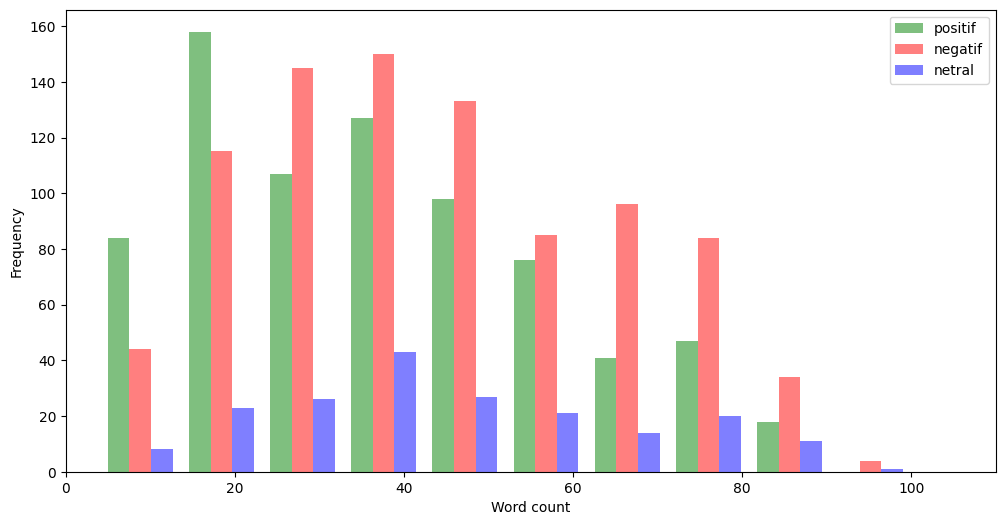

In [26]:
# plot word count distribution for both positive and negative

data['word count'] = data['content'].apply(word_count)
p = data['word count'][data.score == 1]
n = data['word count'][data.score == 0]
t = data['word count'][data.score == 2]
plt.figure(figsize=(12,6))
plt.xlim(0,110)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n, t], color=['g','r','b'], alpha=0.5, label=['positif','negatif','netral'])
plt.legend(loc='upper right'), t

In [28]:
# kata di dataset training
from collections import Counter
all_words = []
for line in list(data['content']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())

Counter(all_words).most_common(20)

[('cod', 1636),
 ('saya', 1337),
 ('bisa', 1311),
 ('dan', 1094),
 ('shopee', 1087),
 ('ada', 896),
 ('nya', 786),
 ('yang', 745),
 ('tidak', 741),
 ('barang', 675),
 ('belanja', 612),
 ('gak', 541),
 ('tapi', 481),
 ('untuk', 478),
 ('mau', 466),
 ('ini', 439),
 ('lagi', 438),
 ('aplikasi', 431),
 ('ongkir', 414),
 ('juga', 387)]

## Data Preparation

<Axes: xlabel='score', ylabel='count'>

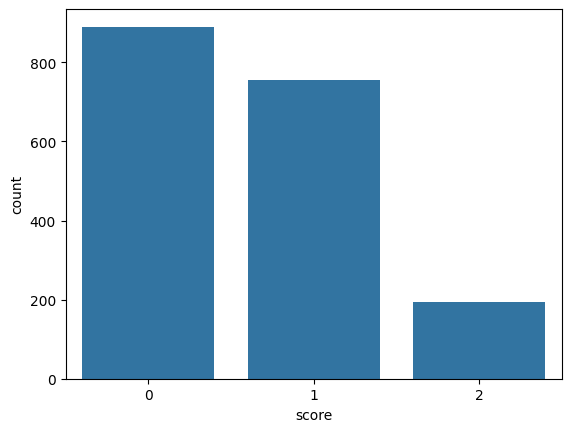

In [34]:
# Total positif, negatif dan netral
%matplotlib inline
sns.countplot(data, x="score")

## Data Processing

In [36]:
#Display column lengkap
data.head()

,userName,score,at,content,word count
0,Hilleria Nababan,1,2023-12-29 04:06:22,"Aplikasi nya memang bagus ,tapi kalau misalnya...",28
1,Wahyu Hidayat,0,2023-12-28 13:48:07,Aplikasi nya sedikit tidak bertanggung jawab k...,25
2,Ahmad Joko,0,2023-12-28 13:41:09,Tolong sistem cod akun saya tidak diblokir ole...,49
3,Welson Bekak,0,2023-12-28 09:35:52,Saya kecewa dengan Shopie karena saya pesan ba...,47
4,Chandra,2,2023-12-27 12:29:25,"Ada berapa expedisi dari pihak Shopee, sampai ...",24


In [37]:
# Removing column yang tidak perlu.
data.drop(['at','userName','word count'], axis=1, inplace=True)

In [39]:
# Display setelah remove
data.head(10)

,score,content
0,1,"Aplikasi nya memang bagus ,tapi kalau misalnya..."
1,0,Aplikasi nya sedikit tidak bertanggung jawab k...
2,0,Tolong sistem cod akun saya tidak diblokir ole...
3,0,Saya kecewa dengan Shopie karena saya pesan ba...
4,2,"Ada berapa expedisi dari pihak Shopee, sampai ..."
5,1,Selamat malam mhon maaf saya mu tanya lebih ba...
6,0,maaf ganggu kak..tapi knp ya tulisan di barang...
7,1,shopee makin mantap terima kasih sudah memberi...
8,0,Saya tdk suka yg mengantar barang iya.. walaup...
9,0,Buset 5x belanja tertulis gratis ongkir via co...


### Check Null Value

In [40]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

score      0.0
content    0.0
dtype: float64

Tidak ada null value

### Convert ke tipe String

In [41]:
#convrting pandas object to a string type
data['content'] = data['content'].astype('str')

In [48]:
nltk.download('stopwords')
stopword = set(stopwords.words('indonesian'))
print(stopword)

{'bahkan', 'menaiki', 'menyiapkan', 'hampir', 'sebenarnya', 'diibaratkan', 'sekalian', 'tersebutlah', 'pernah', 'semisalnya', 'belakangan', 'sekarang', 'sebelumnya', 'merupakan', 'disinilah', 'hendak', 'bermacam-macam', 'dijelaskannya', 'dapat', 'memerlukan', 'dimisalkan', 'seterusnya', 'dikatakan', 'dilakukan', 'sejenak', 'bilakah', 'seolah', 'diucapkan', 'adalah', 'ternyata', 'berupa', 'kira-kira', 'dari', 'semata-mata', 'inginkah', 'tinggi', 'kata', 'diperkirakan', 'selalu', 'nyatanya', 'seluruhnya', 'diberikannya', 'memulai', 'terjadinya', 'apakah', 'memungkinkan', 'menegaskan', 'dituturkannya', 'sekurang-kurangnya', 'semasa', 'sewaktu', 'sering', 'oleh', 'harus', 'setinggi', 'bertanya-tanya', 'ikut', 'ingin', 'disebutkannya', 'bersiap', 'kembali', 'akankah', 'begini', 'tentunya', 'tempat', 'menurut', 'meyakini', 'apa', 'seharusnya', 'bahwa', 'disampaikan', 'dalam', 'tampaknya', 'diketahuinya', 'tapi', 'demikianlah', 'asalkan', 'berujar', 'seseorang', 'khususnya', 'lagian', 'kitala

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [60]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_opini(opini):
  # Lower Casing
    opini = opini.lower()
    opini=opini[1:]
    # Removing all URls
    opini = re.sub(urlPattern,'',opini)
    # Removing all @username.
    opini = re.sub(userPattern,'', opini)
    #Remove punctuations
    opini = opini.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(opini)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [112]:
data['processed_opini'] = data['content'].apply(lambda x: process_opini(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [113]:
#Display 10 row data teratas
data.head(10)

,score,content,processed_opini
0,1,"Aplikasi nya memang bagus ,tapi kalau misalnya...",plikasi nya bagus seler mengantar kerumah dike...
1,0,Aplikasi nya sedikit tidak bertanggung jawab k...,plikasi nya bertanggung karna kesalahan penjua...
2,0,Tolong sistem cod akun saya tidak diblokir ole...,olong sistem cod akun diblokir shopie membantu...
3,0,Saya kecewa dengan Shopie karena saya pesan ba...,aya kecewa shopie pesan barang jas hujan baju ...
4,2,"Ada berapa expedisi dari pihak Shopee, sampai ...",da expedisi shopee salah alamat kurirnya bingu...
5,1,Selamat malam mhon maaf saya mu tanya lebih ba...,elamat malam mhon maaf mu no kurir cantum dung...
6,0,maaf ganggu kak..tapi knp ya tulisan di barang...,aaf ganggu kaktapi knp ya tulisan barangnya co...
7,1,shopee makin mantap terima kasih sudah memberi...,hopee mantap terima kasih layanan terbaik semo...
8,0,Saya tdk suka yg mengantar barang iya.. walaup...,aya tdk suka yg mengantar barang iya cod sdh b...
9,0,Buset 5x belanja tertulis gratis ongkir via co...,uset 5x belanja tertulis gratis ongkir via cod...


# Analyzing the data

> #### Analyse preprocessed data visualisasi dengan plot Word Clouds untuk opini Positif and Negatif tweets from our dataset dan melihat proporsi nya

### Word-Cloud opini Negatif

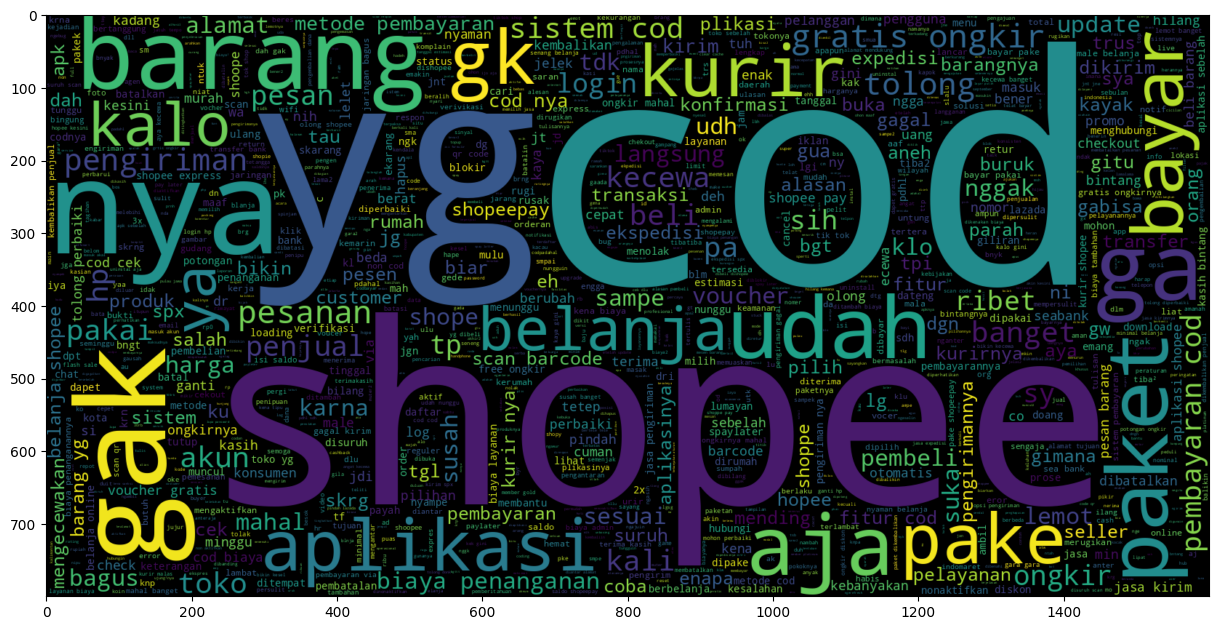

In [114]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.score == 0].processed_opini))
plt.imshow(wc , interpolation = 'bilinear')

### Word-Cloud opini Positif

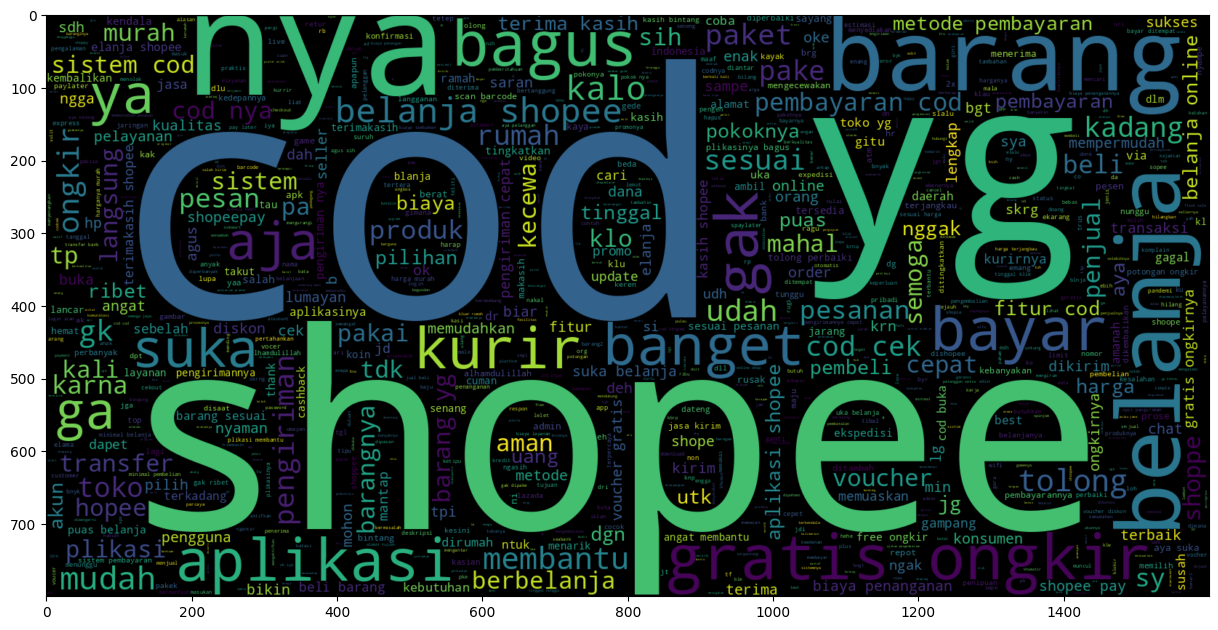

In [115]:
#Word-cloud opini positif
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.score == 1].processed_opini))
plt.imshow(wc , interpolation = 'bilinear')

### Word-Cloud opini Netral

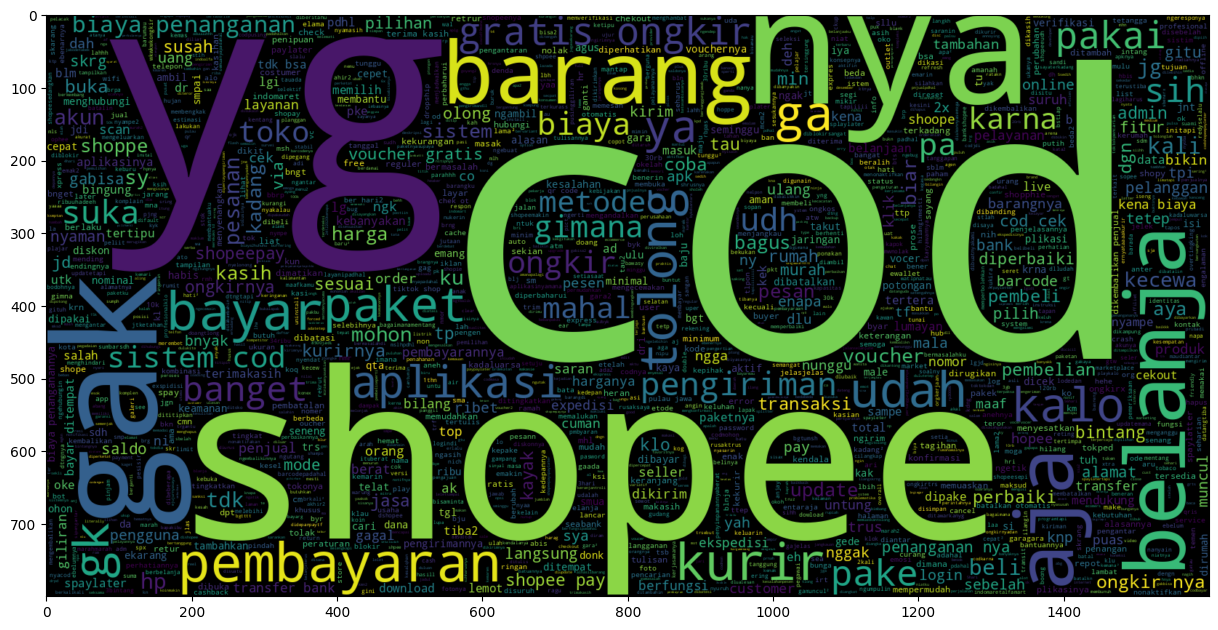

In [116]:
#Word-cloud opini Netral
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.score == 2].processed_opini))
plt.imshow(wc , interpolation = 'bilinear')

## Vectorization dan Splitting data <a id="6"></a>
Storing input variable-content to X and output variable-score to y

In [117]:
X = data['processed_opini'].values
y = data['score'].values

In [118]:
print(X.shape)
print(y.shape)

(1840,)
(1840,)


## Convert text to word frequency vectors
### TF-IDF

In [119]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names_out()))

Vector fitted.
No. of feature_words:  7843


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [121]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1472, 7843)
y_train (1472,)

X_test (368, 7843)
y_test (368,)


# Model Building

### Model evaluating function

In [126]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negatif','Positif','Netral']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot=True, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    #    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
    #            xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Logistic Regression <a id="8"></a>

Accuracy of model on training data : 85.39402173913044
Accuracy of model on testing data : 73.91304347826086 

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       182
           1       0.78      0.73      0.75       150
           2       0.00      0.00      0.00        36

    accuracy                           0.74       368
   macro avg       0.50      0.54      0.52       368
weighted avg       0.67      0.74      0.70       368



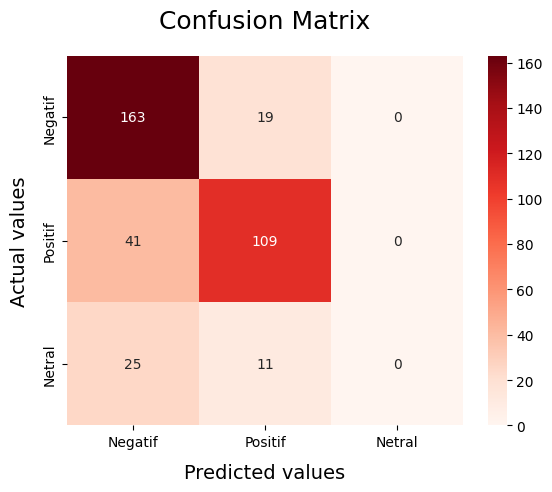

In [127]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

### Linear SVM

Accuracy of model on training data : 99.59239130434783
Accuracy of model on testing data : 72.28260869565217 

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       182
           1       0.75      0.73      0.74       150
           2       0.20      0.03      0.05        36

    accuracy                           0.72       368
   macro avg       0.56      0.54      0.52       368
weighted avg       0.68      0.72      0.69       368



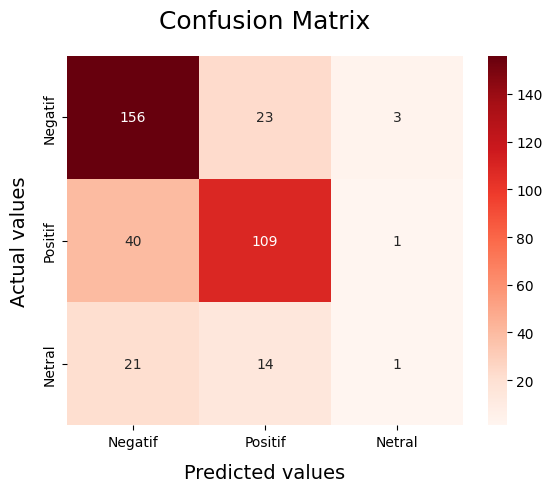

In [128]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

### Random Forest

Accuracy of model on training data : 96.19565217391305
Accuracy of model on testing data : 66.84782608695652 

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       182
           1       0.67      0.65      0.66       150
           2       0.00      0.00      0.00        36

    accuracy                           0.67       368
   macro avg       0.45      0.49      0.46       368
weighted avg       0.60      0.67      0.63       368



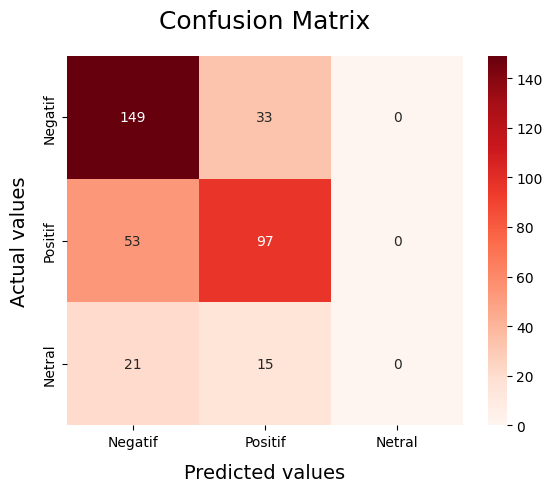

In [129]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

### Naive Bayes

Accuracy of model on training data : 85.32608695652173
Accuracy of model on testing data : 72.82608695652173 

              precision    recall  f1-score   support

           0       0.73      0.85      0.78       182
           1       0.73      0.76      0.75       150
           2       0.00      0.00      0.00        36

    accuracy                           0.73       368
   macro avg       0.49      0.54      0.51       368
weighted avg       0.66      0.73      0.69       368



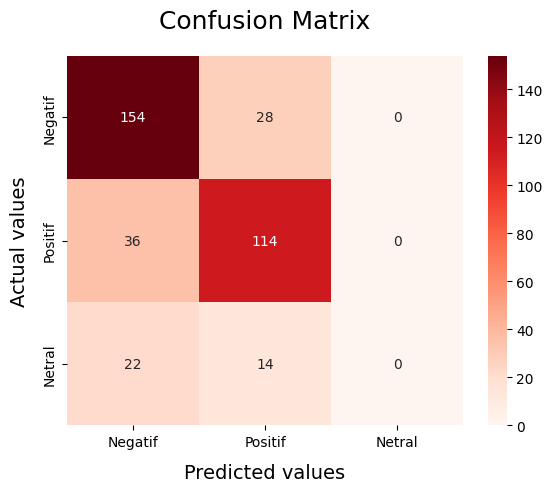

In [130]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

# Model Saving, Loading and Prediction

In [131]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

### Predict using saved model

In [132]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [141]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_opini(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)

    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(opini, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['opini','sentiment'])
    df = df.replace([0,1,2], ["Negative","Positive","Netral"])
    return df

In [145]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()

    # Text to classify should be in a list.
    opini = ["Barangnya bagus",
            "Terima Kasih COD sudah sampai",
            "Kapan ya barangnya sampai"]

    df = predict(vectoriser, lg, opini)
    print(df.head())


                           opini sentiment
0                Barangnya bagus  Positive
1  Terima Kasih COD sudah sampai  Positive
2      Kapan ya barangnya sampai  Negative


#Conclusion


Dari 4 Model yang ada, **Logistic Regression, Linier SVM, Random Forest** dan **Naive Bayes**. Nilai accuracy Model Logistic Regression yang terbaik diantara model lainnya yaitu 0.74

